# Stock Price Prediction of Microsoft

In [91]:
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [92]:

# df_final = pd.read_csv("tata.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final = yf.download("TATAMOTORS.NS",start= '2010-01-01' , end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [93]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,152.664978,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.004944,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.235840,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.100540,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,145.894867,16495776


In [94]:

df_final.shape

(3209, 6)

In [95]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3.209000e+03
mean,315.798018,320.377807,310.667682,315.319090,312.200532,2.062994e+07
std,128.727568,129.857625,127.238387,128.458188,129.505822,2.705275e+07
min,66.500000,66.900002,63.500000,65.300003,65.097115,0.000000e+00
25%,196.284653,200.350006,193.999161,196.353912,190.369598,6.884223e+06
50%,304.899994,309.950012,300.477081,305.600006,302.323669,1.160343e+07
75%,427.000000,432.100006,421.149994,425.750000,423.829041,2.179907e+07
max,600.212097,605.901123,589.873047,598.134399,596.034607,3.905778e+08


In [96]:
df_final.isnull().values.any()

False

<Axes: xlabel='Date'>

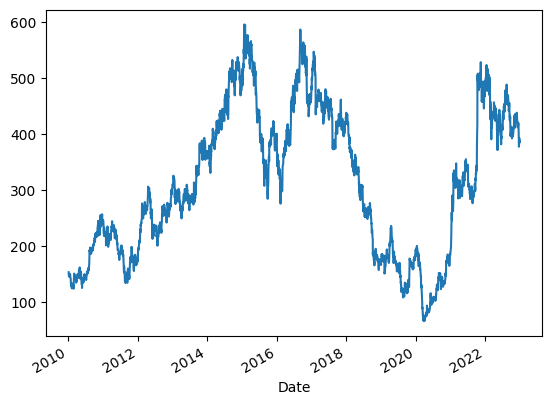

In [97]:
df_final['Adj Close'].plot()

# Correlation Analysis

In [98]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

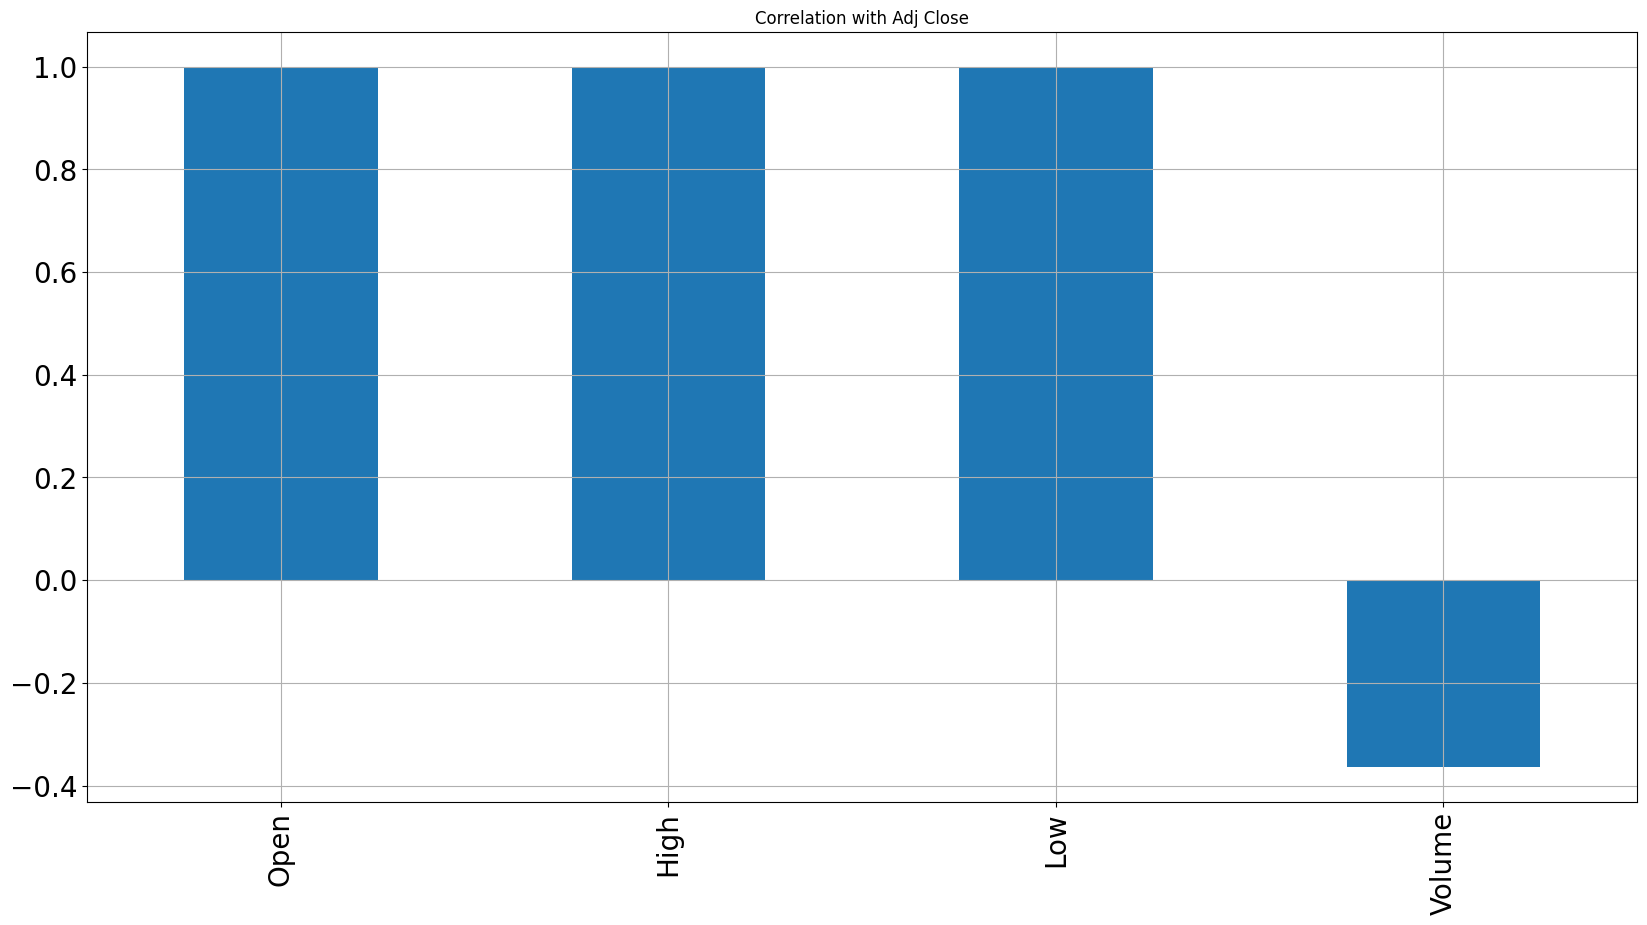

In [99]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [100]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,152.664978,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.004944,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.235840,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.100540,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,145.894867,16495776


In [101]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.168262,0.180223,0.176082,0.071449
2010-01-05,0.179422,0.185987,0.170499,0.060601
2010-01-06,0.179311,0.178167,0.182022,0.038381
2010-01-07,0.177383,0.176295,0.172586,0.058175
2010-01-08,0.168299,0.171339,0.174484,0.042234


In [103]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.168262,0.180223,0.176082,0.071449
2010-01-05,0.179422,0.185987,0.170499,0.060601
2010-01-06,0.179311,0.178167,0.182022,0.038381
2010-01-07,0.177383,0.176295,0.172586,0.058175
2010-01-08,0.168299,0.171339,0.174484,0.042234


Shape of features :  (3209, 4)
Shape of target :  (3209, 1)


,Open,High,Low,Volume
Date,,,,
2022-12-23,0.606132,0.599442,0.595585,0.050958
2022-12-26,0.587864,0.600741,0.592166,0.043472
2022-12-27,0.606132,0.613264,0.617433,0.036798
2022-12-28,0.613627,0.610388,0.621042,0.021619
2022-12-29,0.604258,0.599442,0.607079,0.040011


,Adj Close
Date,
2022-12-23,383.604401
2022-12-26,392.925354
2022-12-27,390.084229
2022-12-28,384.700989
2022-12-29,386.744659



 -----After process------ 

Shape of features :  (3119, 4)
Shape of target :  (3119, 1)


,Adj Close
Date,
2022-08-16,483.891846
2022-08-17,483.293701
2022-08-18,469.536591
2022-08-19,453.187561
2022-08-22,459.019379


# Train test Split using Timeseriessplit

In [104]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [105]:

X_train.shape

(2836, 4)

In [106]:
X_test.shape

(283, 4)

In [107]:
y_train.shape

(2836,)

In [108]:
y_test.shape

(283,)

In [109]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

RMSE:  12.827710478487868
R2 score:  0.6451294025913007


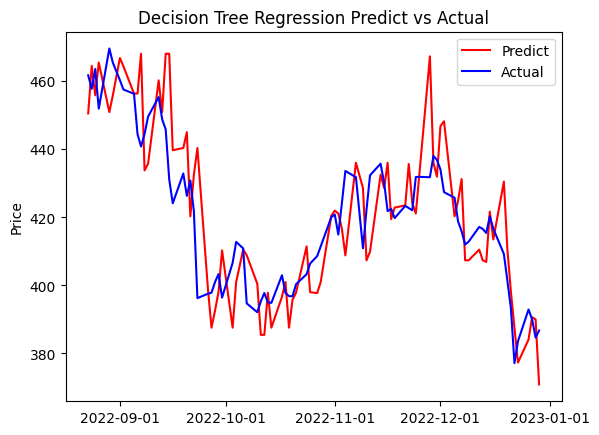

In [110]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

# Process the data for LSTM

In [111]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model building : LSTM

In [112]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
355/355 [==============================] - 2s 3ms/step - loss: 103920.4141
Epoch 2/200
355/355 [==============================] - 1s 3ms/step - loss: 95287.1406
Epoch 3/200
355/355 [==============================] - 1s 3ms/step - loss: 79054.9062
Epoch 4/200
355/355 [==============================] - 1s 3ms/step - loss: 60168.8750
Epoch 5/200
355/355 [==============================] - 1s 3ms/step - loss: 42104.6836
Epoch 6/200
355/355 [==============================] - 1s 2ms/step - loss: 26966.8008
Epoch 7/200
355/355 [==============================] - 1s 4ms/step - loss: 15760.6611
Epoch 8/200
355/355 [==============================] - 1s 4ms/step - loss: 8512.9004
Epoch 9/200
355/355 [==============================] - 1s 3ms/step - loss: 4488.9199
Epoch 10/200
355/355 [==============================] - 1s 3ms/step - loss: 2584.0010
Epoch 11/200
355/355 [==============================] - 1s 3ms/step - loss: 1772.8402
Epoch 12/200
355/355 [==============================] -

# Evaluation of Model

In [113]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


89/89 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	0.995
The R2 score on the Test set is:	0.969


## Predictions made by LSTM

In [114]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

283/283 [==============================] - 1s 2ms/step - loss: 161.5843


In [115]:
print('LSTM: %f'%score_lstm)

LSTM: 161.584274


In [116]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

9/9 [==============================] - 0s 3ms/step


# LSTM's Prediction Visual

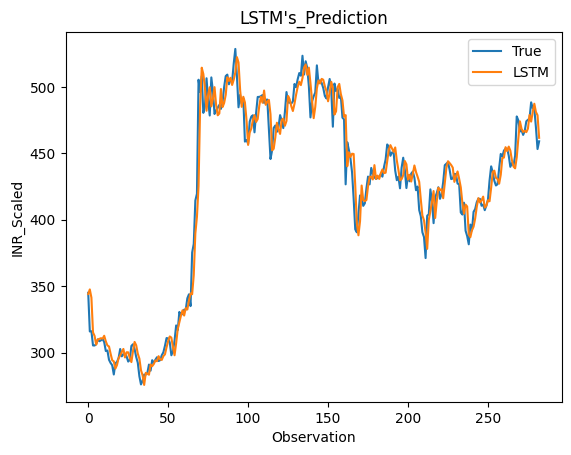

In [117]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


# Converting Prediction data
In this step I have made the prediction of test data and will convert the dataframe to csv so that we can see the price difference between actual and predicted price.

In [118]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('result.xlsx')

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact